In [3]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd

In [4]:

# PostgreSQL connection details
postgres_user = 'postgres'
postgres_password = ''
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'football'

# Create a PostgreSQL connection using SQLAlchemy
postgres_uri = f'postgresql://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(postgres_uri)

# Define table name (adjust if necessary)
table_name = 'man_city_fixtures_with_match_id'

# Read the table into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

#

         Date           Time            Comp        Round  Day Venue Result  \
0  2023-08-11  20:00 (00:45)  Premier League  Matchweek 1  Fri  Away      W   
1  2023-08-19  20:00 (00:45)  Premier League  Matchweek 2  Sat  Home      W   
2  2023-08-27  14:00 (18:45)  Premier League  Matchweek 3  Sun  Away      W   
3  2023-09-02  15:00 (19:45)  Premier League  Matchweek 4  Sat  Home      W   
4  2023-09-16  15:00 (19:45)  Premier League  Matchweek 5  Sat  Away      W   

   GF  GA       Opponent   xG  xGA  Poss          Captain Formation  \
0   3   0        Burnley  1.9  0.3    65  Kevin De Bruyne   4-2-3-1   
1   1   0  Newcastle Utd  1.0  0.3    59      Kyle Walker   4-2-3-1   
2   2   1  Sheffield Utd  3.5  0.7    79      Kyle Walker   4-2-3-1   
3   5   1         Fulham  2.2  1.4    68      Kyle Walker   4-2-3-1   
4   3   1       West Ham  3.6  0.9    68      Kyle Walker   4-2-3-1   

  Opp Formation  match_id  
0         5-4-1         1  
1         4-3-3         2  
2         3-5-

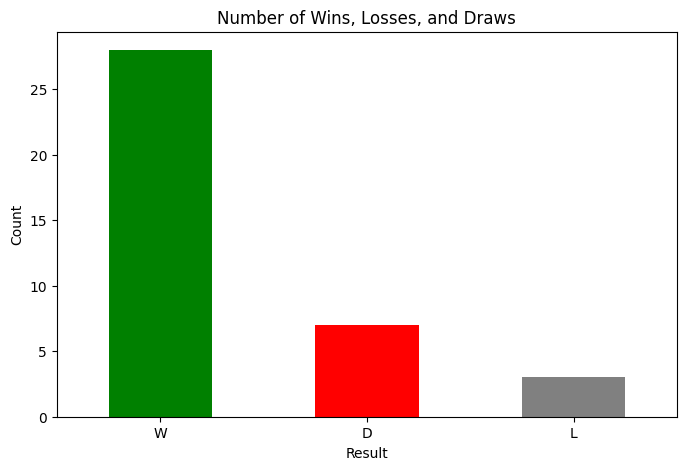

In [7]:
 # 1. **Wins, Losses, and Draws Visualization**

# Count the occurrences of 'W', 'L', 'D' in the 'Result' column
result_counts = df['Result'].value_counts()

# Plot the result counts
plt.figure(figsize=(8, 5))
result_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Number of Wins, Losses, and Draws')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




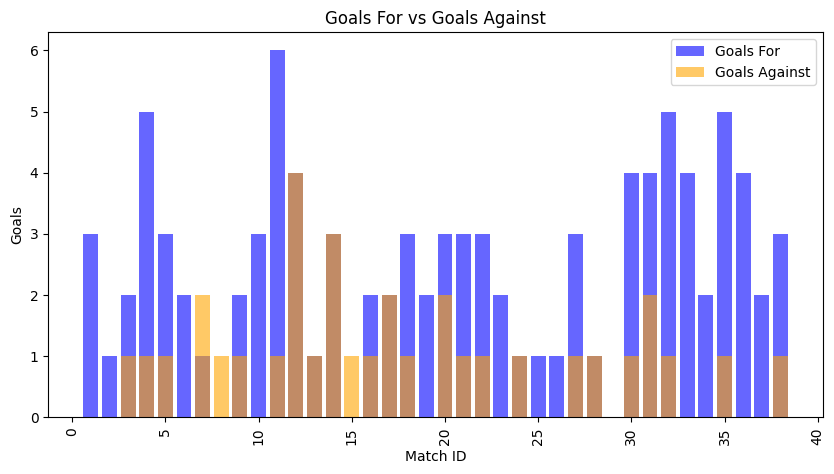

In [8]:
# 2. **Goals for (GF) and Goals against (GA) Comparison**

plt.figure(figsize=(10, 5))

# Plot GF vs GA (Goals For vs Goals Against)
plt.bar(df['match_id'], df['GF'], alpha=0.6, label='Goals For', color='blue')
plt.bar(df['match_id'], df['GA'], alpha=0.6, label='Goals Against', color='orange')

plt.title('Goals For vs Goals Against')
plt.xlabel('Match ID')
plt.ylabel('Goals')
plt.legend()
plt.xticks(rotation=90)
plt.show()


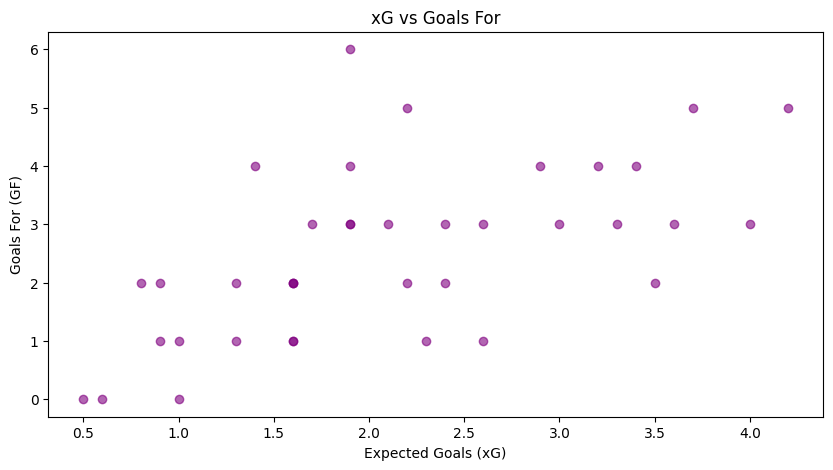

In [10]:

# 3. **xG vs Goals Visualization (Expected Goals vs Actual Goals)**

plt.figure(figsize=(10, 5))

# Plot xG vs GF (Expected Goals vs Actual Goals)
plt.scatter(df['xG'], df['GF'], color='purple', alpha=0.6)
plt.title('xG vs Goals For')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals For (GF)')
plt.show()


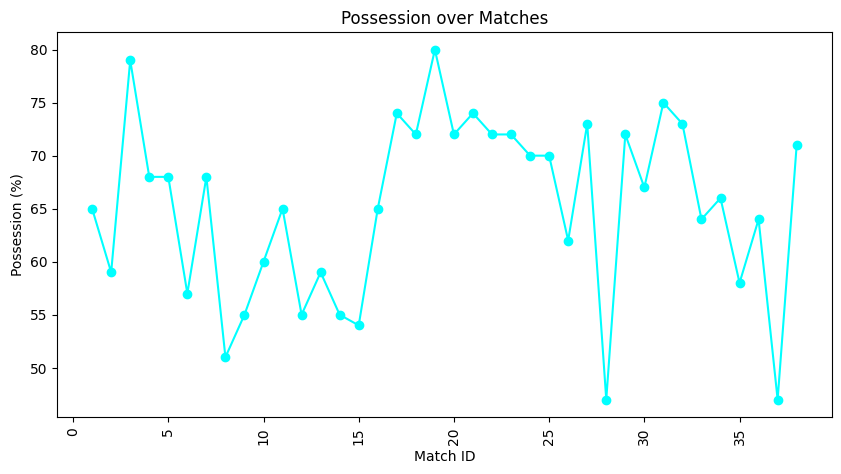

In [12]:

# 4. **Possession Analysis (Average Possession)**

# Convert 'Poss' to numeric (if not already) for calculation of the mean
df['Poss'] = pd.to_numeric(df['Poss'], errors='coerce')

# Plot the average possession
plt.figure(figsize=(10, 5))
plt.plot(df['match_id'], df['Poss'], label='Possession', marker='o', color='cyan')
plt.title('Possession over Matches')
plt.xlabel('Match ID')
plt.ylabel('Possession (%)')
plt.xticks(rotation=90)
plt.show()



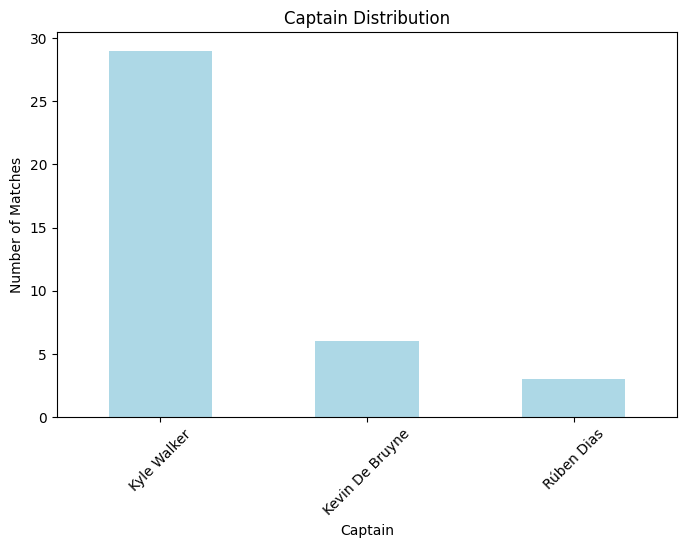

In [15]:
# 5. **Captain Distribution**

# Count the number of matches each player captained
captain_counts = df['Captain'].value_counts()

# Plot the captain distribution
plt.figure(figsize=(8, 5))
captain_counts.plot(kind='bar', color='lightblue')
plt.title('Captain Distribution')
plt.xlabel('Captain')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



In [14]:
# Close the engine after use
engine.dispose()